<center><h1> Flight Fare Prediction </h1></center>

<img src="flight_banner.jpg"  width='1000' height='1000'/>

**Problem Statemtent** :

We will use these flight records to determine flight prices based on the different parameters.

**Data Description** :
  - Columns:
       * Airline
       * Date_of_Journey
       * Source
       * Destination
       * Route
       * Dep_Time
       * Arrival_Time
       * Duration
       * Total_Stops
       * Additional_Info
       * Price  

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [7]:
from sklearn.linear_model import Ridge ,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.metrics import mean_squared_error as mse

In [9]:
from sklearn.metrics import r2_score

## Load Dataset

In [10]:
data = pd.read_csv("flight_fare.csv" ,parse_dates=['Date_of_Journey'])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
data.shape

(10683, 11)

In [12]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Exploratory Data Analysis

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [15]:
#data.describe(include='all').T
data.describe(include=[object]).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


In [16]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [17]:
(data.isnull().sum() / len(data))*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [20]:
data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,2019-01-06,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,2019-05-21,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,2019-05-18,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,2019-06-06,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,2019-01-06,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,2019-06-06,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [21]:
data = data.drop_duplicates(keep='first')

In [22]:
data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [23]:
data.shape

(10462, 11)

In [24]:
data['Month'] = data['Date_of_Journey'].dt.month

In [25]:
data = data.drop(['Date_of_Journey'] ,axis=1)

In [26]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


## EDA

`1.` : **Month vs Price**

In [27]:
month_wise_price = data.groupby(['Month'])['Price'].mean()

<AxesSubplot:xlabel='Month', ylabel='Price'>

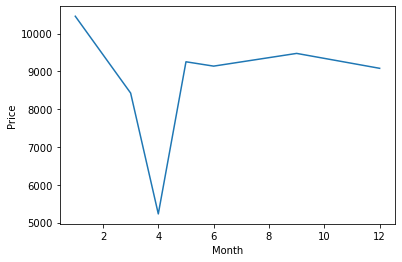

In [28]:
sns.lineplot( month_wise_price.index , month_wise_price)

`2.` : **Number of Flights vs Journey_month**

<AxesSubplot:xlabel='Month', ylabel='count'>

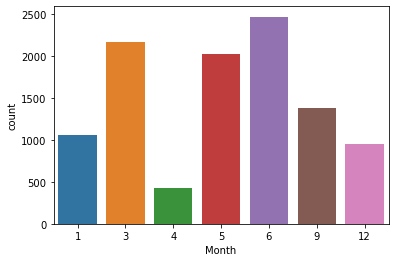

In [29]:
sns.countplot(x='Month' ,data=data)

`3` : **Airline vs Price**

In [30]:
data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [31]:
airline_wise_price = data.groupby(['Airline'])['Price'].mean()

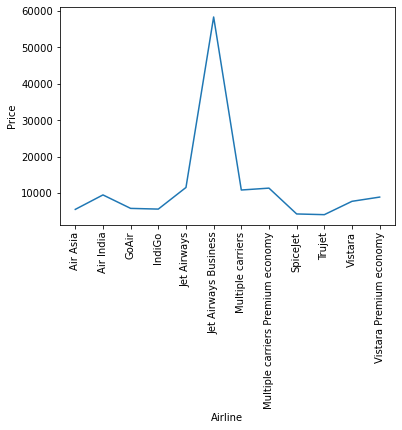

In [32]:
sns.lineplot( airline_wise_price.index , airline_wise_price)
plt.xticks(rotation=90);

In [33]:
data.groupby(['Airline'])['Price'].mean().sort_values(ascending=False)

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11599.021081
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9556.608028
Vistara Premium economy               8962.333333
Vistara                               7801.355649
GoAir                                 5861.056701
IndiGo                                5668.469897
Air Asia                              5590.260188
SpiceJet                              4335.841718
Trujet                                4140.000000
Name: Price, dtype: float64

Text(0.5, 1.0, 'Price VS Airlines')

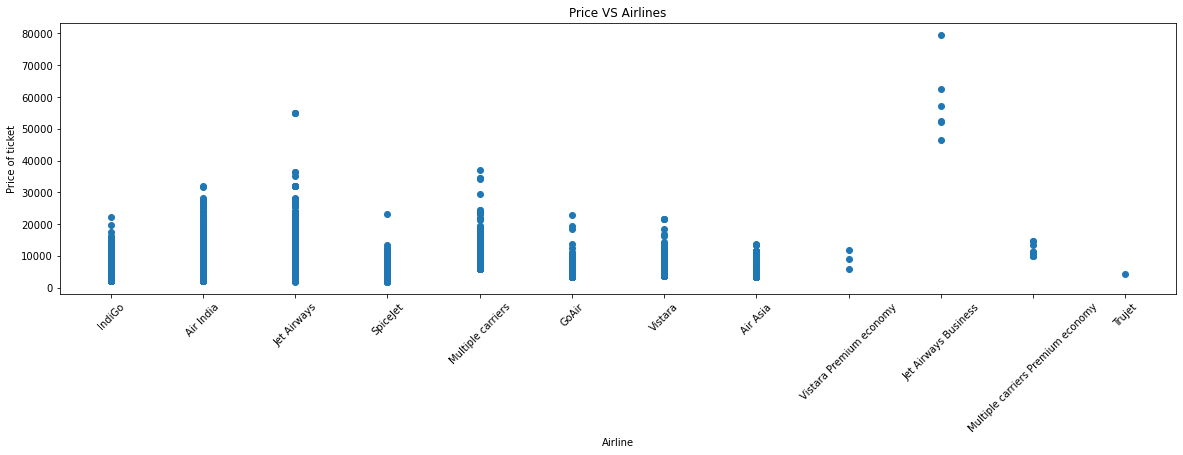

In [34]:
plt.figure(figsize=(20,5))

plt.scatter(data['Airline'], data['Price'])

plt.xticks(rotation=45)

plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.title('Price VS Airlines')

`4.` : **Types of Airline vs Number of Flights**

Text(0.5, 1.0, 'Count of flights with different Airlines')

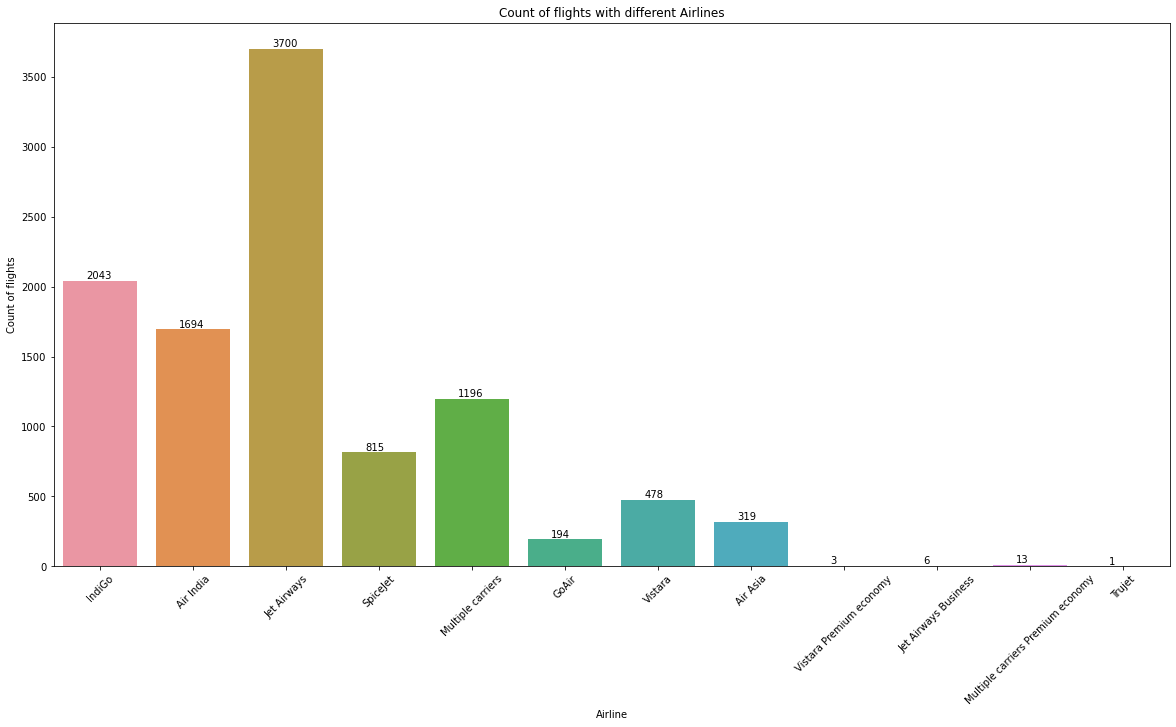

In [35]:
plt.figure(figsize=(20,10))

ax = sns.countplot(x='Airline' ,data=data)
for count in ax.patches:
    ax.annotate( 
                 int(count.get_height()) ,
                 (count.get_x()+0.25 , count.get_height()+1) ,
                 va = 'bottom' ,
                 color = 'black'
               )
    
plt.xticks(rotation=45)

plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.title('Count of flights with different Airlines')

`5` : **Additional_Info**

In [36]:
data['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [37]:
data = data.drop(['Additional_Info'] ,axis=1)

`6` : **Source**

In [38]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [39]:
data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

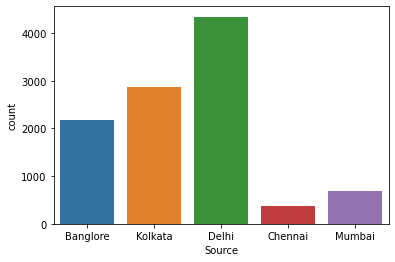

In [40]:
sns.countplot(data['Source'])

`7` : **Destination** 

In [41]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [42]:
data['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

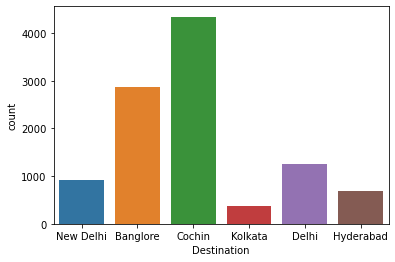

In [43]:
sns.countplot(data['Destination'])

`8` : **Route**

In [44]:
data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [45]:
route_price = data.groupby(['Route'])['Price'].mean()

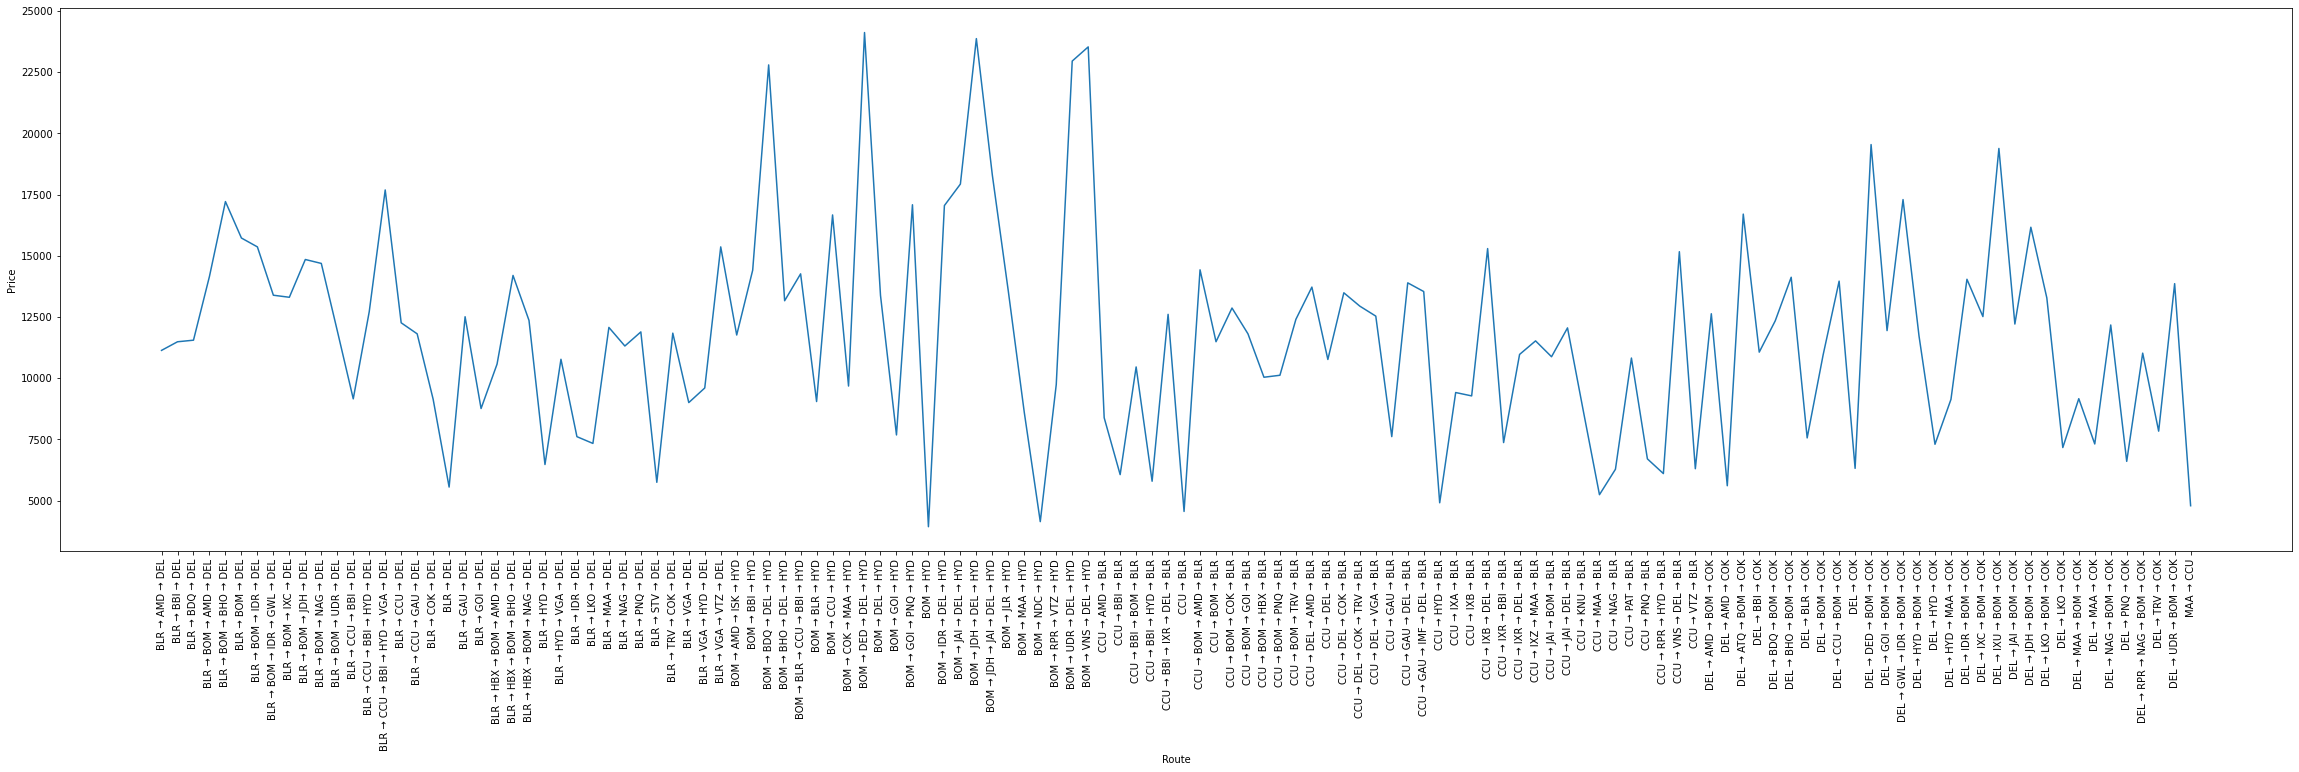

In [46]:
plt.figure(figsize=(40,10))
sns.lineplot( route_price.index , route_price)
plt.xticks(rotation=90);

`9` : **Duration**

In [47]:
data['Duration'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [48]:
duration_price = data.groupby(['Duration'])['Price'].mean()

In [49]:
duration_price.sort_values()[:10]

Duration
95     2276.133333
80     3286.377049
90     3721.484456
75     3944.333333
235    4226.000000
250    4226.000000
145    4268.459184
135    4452.066667
240    4462.166667
150    4647.077273
Name: Price, dtype: float64

In [50]:
duration_price.sort_values(ascending=False)[:10]

Duration
815     22294.0
2230    21314.0
2860    20694.0
2820    20064.0
2135    19907.0
1205    19252.0
1135    19030.5
205     18797.0
1910    17926.0
1770    17686.0
Name: Price, dtype: float64

In [51]:
data[ data['Duration']==815 ]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month
10351,Jet Airways,Mumbai,Hyderabad,BOM → DEL → HYD,03:00,16:35,815,1 stop,22294,12


`10`:**Stops**

In [52]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [53]:
data['Total_Stops'] = data['Total_Stops'].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'] ,[0,2,1,3,4])

In [54]:
data['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [55]:
stop_with_price = data.groupby('Total_Stops')['Price'].mean()
stop_with_price = stop_with_price.sort_index()
stop_with_price

Total_Stops
0     5018.506763
1    10594.123556
2    12761.099393
3    13260.674419
4    17686.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

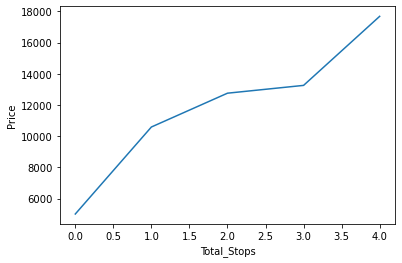

In [56]:
sns.lineplot( stop_with_price.index , stop_with_price)

`11` : **Arrival_Time and Dep_Time**

In [57]:
data['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [58]:
data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x : x[0:5])

In [59]:
data['Arrival_Time'].unique()

array(['01:10', '13:15', '04:25', '23:30', '21:35', '11:25', '10:25',
       '05:05', '19:15', '23:00', '22:55', '13:55', '09:20', '19:50',
       '12:35', '19:20', '13:20', '06:50', '21:50', '08:15', '03:35',
       '12:55', '23:15', '21:00', '20:20', '16:45', '19:00', '18:10',
       '15:15', '08:35', '11:05', '14:15', '10:55', '00:15', '02:45',
       '12:00', '23:55', '01:30', '09:25', '15:25', '15:35', '08:30',
       '10:05', '14:30', '07:55', '10:35', '22:35', '04:40', '07:25',
       '20:45', '14:25', '22:30', '23:20', '07:40', '22:50', '14:35',
       '08:55', '18:50', '09:05', '01:35', '09:40', '16:25', '11:10',
       '17:05', '17:50', '23:10', '08:45', '07:45', '16:10', '00:55',
       '23:35', '20:00', '00:40', '21:45', '18:15', '03:25', '04:15',
       '21:10', '21:05', '09:45', '18:05', '22:00', '15:30', '08:50',
       '08:00', '19:35', '11:20', '10:15', '12:45', '02:20', '07:15',
       '11:50', '18:30', '19:45', '21:20', '20:05', '09:10', '22:20',
       '10:10', '01:

In [60]:
data['Arrival_hr']  = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [61]:
data['Dep_hr']  = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute

In [62]:
data = data.drop(['Arrival_Time' ,'Dep_Time'] ,axis=1)

In [63]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Month,Arrival_hr,Arrival_min,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,1,21,35,16,50


`12` : **Encoding**

In [64]:
categorical_feat = ['Airline','Source','Destination','Route']
numerical_feat = ['Duration' ,'Arrival_hr','Arrival_min','Dep_hr','Dep_min']

In [65]:
sc = StandardScaler()

In [66]:
data[numerical_feat] = sc.fit_transform(data[numerical_feat])

In [67]:
for feat in categorical_feat :
    le = LabelEncoder()
    data[feat] = le.fit_transform(data[feat])

In [68]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Month,Arrival_hr,Arrival_min,Dep_hr,Dep_min
0,3,0,5,18,-0.918323,0,3897,3,-1.807045,-0.888367,1.662578,-0.234123
1,1,3,0,84,-0.369065,2,7662,1,-0.056554,-0.586611,-1.305841,1.360364
2,4,2,1,118,1.019061,2,13882,9,-1.369422,0.016902,-0.607390,0.031625
3,3,3,0,91,-0.608741,1,6218,12,1.402189,0.318658,0.964126,-1.031367
4,3,0,5,29,-0.688633,1,13302,1,1.110440,0.620415,0.614900,1.360364


`13` : **Log Transformation**

<AxesSubplot:>

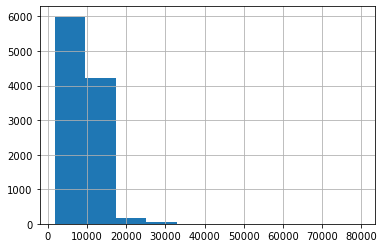

In [69]:
data['Price'].hist()

In [70]:
data['Price'] = np.log1p(data['Price'])

<AxesSubplot:>

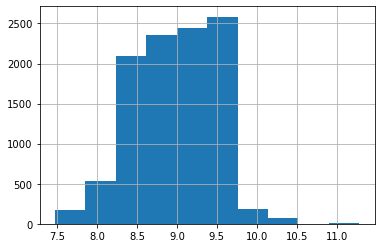

In [71]:
data['Price'].hist()

`14` : **Correlation**

<AxesSubplot:>

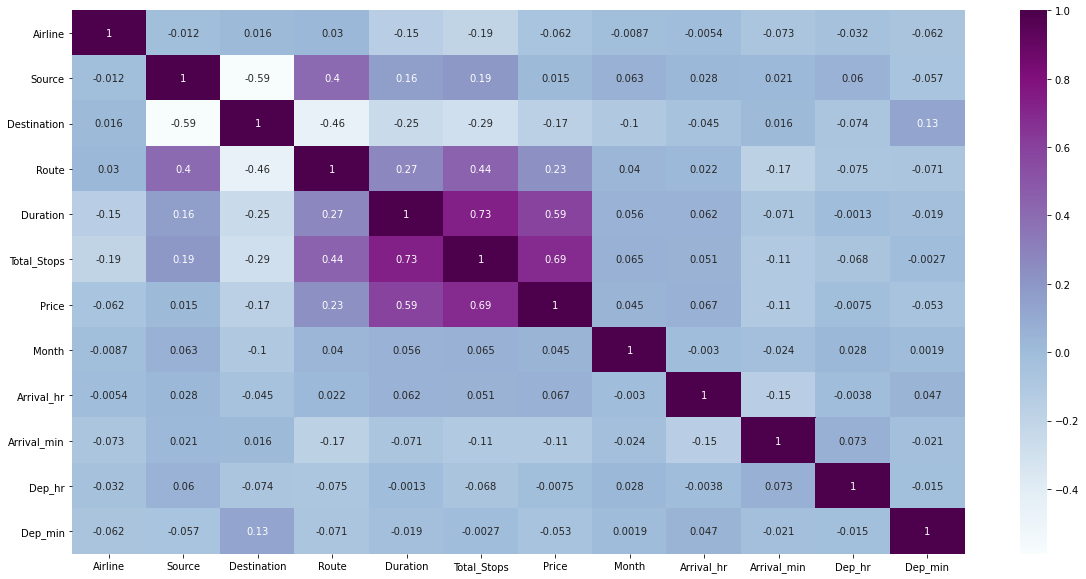

In [72]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr() ,annot=True ,cmap='BuPu')

## Model Preperation

In [73]:
X = data.drop(['Price' ,'Duration'] ,axis=1)
y = data['Price']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Model Building

`1.` **Ridge**

In [75]:
params = {
           'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
         }

In [76]:
ridge_lr = GridSearchCV( 
                          Ridge() ,
                          params  ,
                          cv = 5  ,
                          scoring = 'neg_mean_absolute_error' ,
                          n_jobs = -1
                       )

In [77]:
ridge_lr.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [78]:
ridge_pred = ridge_lr.predict(X_test)

In [79]:
ridge_rmse = np.sqrt( mse(y_test ,ridge_pred) )
ridge_rmse

0.3578059938801531

In [80]:
ridge_r2 = r2_score(y_test ,ridge_pred)
ridge_r2

0.5255490671607639

`2.` **Lasso**

In [81]:
params = {
           'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
         }

In [82]:
lasso_lr = GridSearchCV(
                         Lasso() , 
                         params  ,
                         cv = 15 ,
                         scoring = 'neg_mean_absolute_error' , 
                         n_jobs = -1
                        )

In [83]:
lasso_lr.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [84]:
lasso_pred = lasso_lr.predict(X_test)

In [85]:
lasso_rmse = np.sqrt( mse(y_test ,lasso_pred) )
lasso_rmse

0.3577852847072057

In [86]:
lasso_r2 = r2_score(y_test ,lasso_pred)
lasso_r2

0.5256039863194726

`3.` **Decision Tree**

In [87]:
params = {
            'max_depth' : list(range(3,30))
         }

In [88]:
dt =  GridSearchCV(
                     DecisionTreeRegressor() , 
                     params                  ,
                     cv = 10 
                  )

In [89]:
dt.fit(X_train ,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [90]:
dt_pred = dt.predict(X_test)

In [91]:
dt_rmse = np.sqrt( mse(y_test ,dt_pred) )
dt_rmse

0.24333124337226872

In [92]:
dt_r2 = r2_score(y_test ,dt_pred)
dt_r2

0.780572107246065

`4.` **Random Forest**

In [93]:
params = {
           'n_estimators': [100, 200, 300, 400, 500] , 
           'min_samples_split': [2, 5, 10]           , 
           'min_samples_leaf': [1, 2, 4]
         }

In [94]:
rf = RandomizedSearchCV(
                         RandomForestRegressor() ,
                         params                  , 
                         n_iter = 20             , 
                         scoring = 'neg_mean_absolute_error', 
                         cv = 5                  , 
                         n_jobs = -1
                      )

In [95]:
rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [96]:
rf_pred = rf.predict(X_test)

In [97]:
rf_rmse = np.sqrt( mse(y_test ,rf_pred) )
rf_rmse

0.21801197306606884

In [98]:
rf_r2 = r2_score(y_test ,rf_pred)
rf_r2

0.8238604945222384

## Conclusion

In [99]:
models = pd.DataFrame({
                        'Model' : ['Ridge' ,'Lasso' ,'Decision Tree' ,'Random Forest'] ,
                        'Root Mean Squared Error': [ridge_rmse ,lasso_rmse ,dt_rmse ,rf_rmse] ,
                        'R-Squared' : [ridge_r2 ,lasso_r2 ,dt_r2 ,rf_r2]
                     })

In [100]:
models

,Model,Root Mean Squared Error,R-Squared
0,Ridge,0.357806,0.525549
1,Lasso,0.357785,0.525604
2,Decision Tree,0.243331,0.780572
3,Random Forest,0.218012,0.823860
